# Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn import ensemble
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

In [2]:
#intervening fit
i_c = pd.read_csv("busyfit_intervening.txt", sep='\t')
#intervening fit without nan or inf or -inf
i_c_2 = i_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#getting all the file names which have nan or inf or -inf
all_i = i_c.merge(i_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
intervening_non_fit = all_i[all_i['_merge'] == 'left_only']
# for i in intervening_non_fit['Filename'].tolist():
#     print(i)

#associated fit
a_c = pd.read_csv("busyfit_associated.txt", sep='\t')
#associated fit without nan or inf or -inf
a_c_2 = a_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

all_a = a_c.merge(a_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_c = all_a[all_a['_merge'] == 'left_only']
# for i in associated_non_fit_c['Filename'].tolist():
#     print(i)

#maccagni fit
a_m = pd.read_csv("Associated_maccagni.txt", sep='\t')
a_m_2 = a_m.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
all_a_m = a_m.merge(a_m_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_m = all_a_m[all_a_m['_merge'] == 'left_only']
# for i in associated_non_fit_m['Filename'].tolist():
#     print(i)

#adding coloumn int or ass to all fits
i_c_2['Class'] = '1'

a_m_2['Class'] = '0'
a_c_2['Class'] = '0'

i_c_2.reset_index(drop=True, inplace=True)
a_m_2.reset_index(drop=True, inplace=True)
a_c_2.reset_index(drop=True, inplace=True)

tot_fit = pd.concat([a_m_2, a_c_2, i_c_2])
tot_fit

,Filename,Success,Nchan,dof,chi^2,chi^2/dof,rms,A,dA,B_1,...,dX,W_50,dW_50,W_20,dW_20,F_peak,dF_peak,F_int,dF_int,Class
0,J075756.71+395936.1_spec.txt,0,220,215,329.90000,1.534420,0.000271,6.551380e-03,7.871540e-03,0.340817,...,2.438030e+04,662044.000000,4.493600e+04,1.062960e+06,5.139200e+04,0.003374,1.499390e-04,2445.330000,1.048770e+02,0
1,J080601.51+190614.7_spec.txt,2,220,215,251.88600,1.171560,0.000561,1.402350e+08,6.889440e+10,0.194235,...,2.592680e+06,946246.000000,7.369550e+05,1.572530e+06,2.355320e+06,0.004741,1.669680e-02,5141.380000,6.669810e+03,0
2,J080938.88+345537.2_spec.txt,0,179,174,210.16200,1.207830,0.000315,1.220950e-03,3.702940e-04,0.666952,...,2.708820e+04,336005.000000,7.219430e+04,4.409460e+05,7.605470e+04,0.001213,2.758340e-04,408.921000,6.774610e+01,0
3,J083548.14+151717.0_spec.txt,0,220,212,458.53400,2.162900,0.001211,3.962510e-03,1.219900e-02,0.543345,...,7.905630e+05,79326.700000,5.634150e+05,2.990630e+05,1.973190e+06,0.009235,1.221020e-01,1753.190000,8.322960e+03,0
4,J083637.84+440109.6_spec.txt,1,185,177,337.75300,1.908210,0.000353,5.220860e-03,1.355990e-01,0.416695,...,4.459700e+04,279254.000000,6.009380e+04,8.085390e+05,2.715430e+05,0.002125,2.848860e-04,857.783000,1.064080e+02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,SPEC_J1438d.DAT,0,505,500,14.12480,0.028250,0.010000,1.323280e-02,1.296320e-02,0.237052,...,1.611450e-02,0.076026,4.065540e-02,1.074030e-01,4.347480e-02,0.012522,5.776920e-03,0.000972,3.588860e-04,1
20,SPEC_J1443.DAT,1,512,507,5.61184,0.011069,0.010000,7.414230e+08,1.918890e+12,0.082959,...,7.859610e-02,0.030672,2.526360e-02,4.841700e-02,2.148670e-01,0.046496,1.499030e-02,0.001568,9.683650e-04,1
21,SPEC_J1551.DAT,0,511,503,8.73281,0.017361,0.010000,1.016100e-01,1.258670e+13,3.246860,...,5.119260e+09,0.259016,7.602110e+12,4.348360e-01,1.718220e+13,0.066411,5.235680e+11,0.002842,1.414950e+09,1
22,SPEC_J1639.DAT,0,512,504,180.32900,0.357795,0.010000,1.124310e-01,3.582340e-01,0.126561,...,2.170810e-03,0.104726,5.115290e-03,1.432350e-01,5.778230e-03,0.077859,4.274530e-03,0.008203,2.992320e-04,1


In [3]:
# input
X = tot_fit.iloc[:, [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]].values
# output
y = tot_fit.iloc[:, 33].values.astype('int')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Creating a Zero Baseline Model

In [4]:
# checking the scores for zero rule model

score_list = ['roc_auc', 'accuracy', 'average_precision']
for i in score_list:
    print('{} for Zero Rule Model is {}'.format(i, np.mean(cross_val_score(DummyClassifier(strategy='prior'), X, y, scoring=i, cv=cv, n_jobs=-1))))

roc_auc for Zero Rule Model is 0.5
accuracy for Zero Rule Model is 0.784090909090909
average_precision for Zero Rule Model is 0.21590909090909086


# Using SMOTE

In [5]:
model_no_SMOTE = RandomForestClassifier(n_estimators=9, random_state=0)
for i in score_list:
    print('{} for without SMOTE Model is {}'.format(i, np.mean(cross_val_score(model_no_SMOTE, X, y, scoring=i, cv=cv, n_jobs=-1))))

roc_auc for without SMOTE Model is 0.9474537037037039
accuracy for without SMOTE Model is 0.9161616161616163
average_precision for without SMOTE Model is 0.8759656084656086


In [6]:
steps = [('over', SMOTE(sampling_strategy=0.9)), ('model', RandomForestClassifier(n_estimators=9, random_state=0))]
pipeline = Pipeline(steps=steps)
for i in score_list:
    print('{} for SMOTE Model is {}'.format(i, np.mean(cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1))))

roc_auc for SMOTE Model is 0.9488425925925926
accuracy for SMOTE Model is 0.9040404040404041
average_precision for SMOTE Model is 0.8838227513227515


In [7]:
steps = [('over', SMOTE(sampling_strategy=0.9)), ('model', KNeighborsClassifier(n_neighbors=7))]
pipeline = Pipeline(steps=steps)
for i in score_list:
    print('{} for KNN SMOTE Model is {}'.format(i, np.mean(cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1))))

roc_auc for KNN SMOTE Model is 0.9307098765432099
accuracy for KNN SMOTE Model is 0.807070707070707
average_precision for KNN SMOTE Model is 0.7762962962962964


In [8]:
steps = [('over', SMOTE(sampling_strategy=0.9)), ('model', DecisionTreeClassifier(random_state=0))]
pipeline = Pipeline(steps=steps)
for i in score_list:
    print('{} for DT SMOTE Model is {}'.format(i, np.mean(cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1))))

roc_auc for DT SMOTE Model is 0.8224537037037037
accuracy for DT SMOTE Model is 0.8742424242424243
average_precision for DT SMOTE Model is 0.6195286195286195


In [9]:
steps = [('over', SMOTE(sampling_strategy=0.9)), ('model', LogisticRegression(max_iter=100, random_state=0))]
pipeline = Pipeline(steps=steps)
for i in score_list:
    print('{} for LR SMOTE Model is {}'.format(i, np.mean(cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1))))

/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

roc_auc for LR SMOTE Model is 0.558179012345679


/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

accuracy for LR SMOTE Model is 0.7808080808080806
average_precision for LR SMOTE Model is 0.29426767676767684


/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/anirudh/anaconda3/envs/igwn-py39/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [11]:
steps = [('over', SMOTE(sampling_strategy=0.9)), ('model', SVC(kernel='linear', random_state=0))]
pipeline = Pipeline(steps=steps)
for i in score_list:
    print('{} for SVC SMOTE Model is {}'.format(i, np.mean(cross_val_score(pipeline, X, y, scoring=i, cv=cv, n_jobs=-1))))


KeyboardInterrupt



# Using random forrest on the above data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [6]:
# input
X = tot_fit.iloc[:, [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]].values
# output
y = tot_fit.iloc[:, 33].values.astype('int')

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [7]:
acc_RF_1 = []
for train, test in kfold.split(X, y):
    
    xtrain_rf = sc_x.fit_transform(X[train])
    xtest_rf = sc_x.transform(X[test])
    
    rf_1 = RandomForestClassifier(max_depth = 2, n_estimators=3, random_state=0)
    
    rf_1.fit(xtrain_rf,y[train])
    target_predicted_rf = rf_1.predict(xtest_rf)
    acc_RF_1.append(accuracy_score(y[test], target_predicted_rf))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_RF_1), np.mean(acc_RF_1)))

Mean accuracy for 10-fold cross validation : 0.928030303030303


In [58]:
rf = RandomForestClassifier(n_estimators=11, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

scores = cross_val_score(rf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.958


In [65]:
from imblearn import ensemble
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

cc = []
i = 1
while i<14:
    
    model = BalancedRandomForestClassifier(n_estimators=i, random_state = 0)
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    # print('Mean ROC AUC: %.3f' % np.mean(scores))
    cc.append(np.mean(scores))
    i += 1

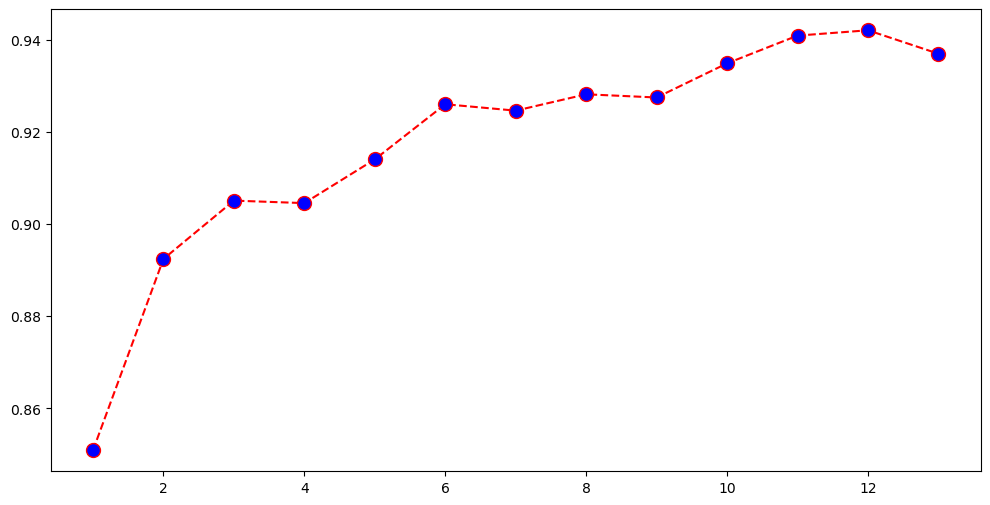

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 14), cc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

In [67]:
gg = []
i = 1
while i<14:
    model_es = EasyEnsembleClassifier(n_estimators=i, random_state = 0)
    scores_es = cross_val_score(model_es, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    #print('Mean ROC AUC: %.3f' % np.mean(scores_es))
    gg.append(np.mean(scores_es))
    i += 1

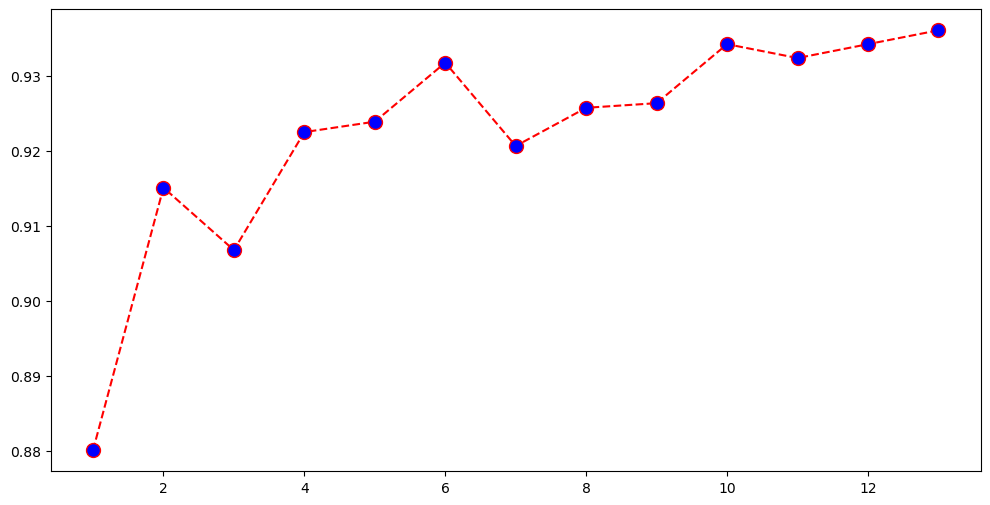

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 14), gg, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

In [69]:
acc_LR = []

for train, test in kfold.split(X, y):
    
    xtrain_lr = sc_x.fit_transform(X[train])
    xtest_lr = sc_x.transform(X[test])
    
    lr = LogisticRegression(max_iter=100, random_state=0, class_weight='balanced')
    
    lr.fit(xtrain_lr,y[train])
    target_predicted_lr = lr.predict(xtest_lr)
    acc_LR.append(accuracy_score(y[test], target_predicted_lr))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_LR), np.mean(acc_LR)))

Mean accuracy for 10-fold cross validation : 0.7909090909090908


Text(0, 0.5, 'Error')

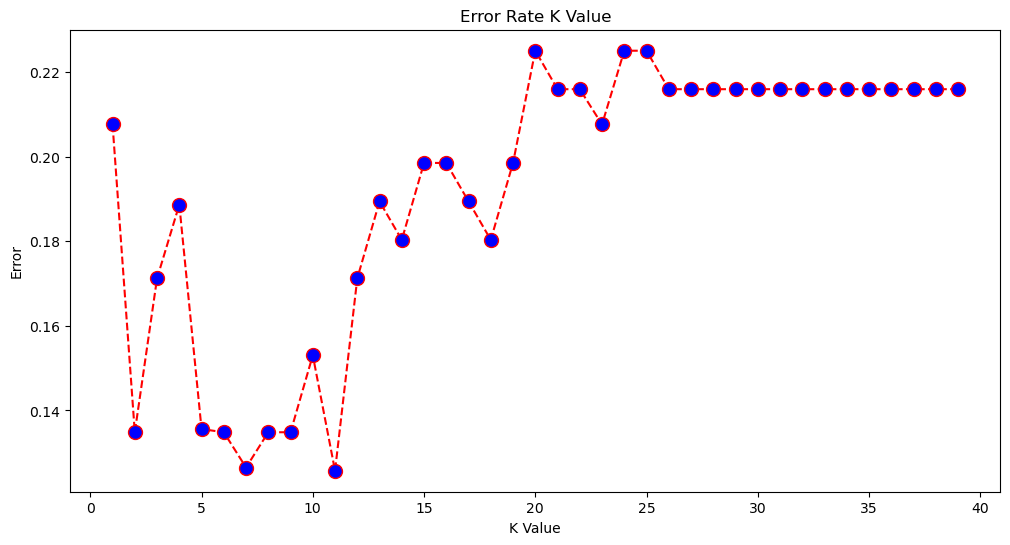

In [74]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    error_i = []
    for train, test in kfold.split(X,y):
        xtrain_kn = sc_x.fit_transform(X[train])
        xtest_kn = sc_x.transform(X[test])
        
        
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(xtrain_kn,y[train])
        target_predicted_kn = kn.predict(xtest_kn)
        #print(target_predicted_kn)
        error_i.append(np.mean(target_predicted_kn != y[test]))
        
    error.append(np.mean(error_i))
        
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

In [75]:
acc_KN = []

for train, test in kfold.split(X, y):
    
    xtrain_kn = sc_x.fit_transform(X[train])
    xtest_kn = sc_x.transform(X[test])
    
    kn = KNeighborsClassifier(n_neighbors=7)
    
    kn.fit(xtrain_kn,y[train])
    target_predicted_kn = kn.predict(xtest_kn)
    acc_KN.append(accuracy_score(y[test], target_predicted_kn))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_KN), np.mean(acc_KN)))

Mean accuracy for 10-fold cross validation : 0.8734848484848484


In [81]:
acc_SVM = []

for train, test in kfold.split(X, y):
    
    xtrain_svm = sc_x.fit_transform(X[train])
    xtest_svm = sc_x.transform(X[test])
    
    svm = SVC(kernel='linear', random_state=0, class_weight='balanced')
    
    svm.fit(xtrain_svm,y[train])
    target_predicted_svm = svm.predict(xtest_svm)
    acc_SVM.append(accuracy_score(y[test], target_predicted_svm))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_SVM), np.mean(acc_SVM)))

Mean accuracy for 10-fold cross validation : 0.7909090909090908


In [84]:
acc_DT = []

for train, test in kfold.split(X, y):
    
    xtrain_dt = sc_x.fit_transform(X[train])
    xtest_dt = sc_x.transform(X[test])
    
    dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')
    
    dt.fit(xtrain_dt,y[train])
    target_predicted_dt = dt.predict(xtest_dt)
    acc_DT.append(accuracy_score(y[test], target_predicted_dt))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_DT), np.mean(acc_DT)))

Mean accuracy for 10-fold cross validation : 0.9007575757575758
